In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions

dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
# Parametros
tamano_red = 5;
doble_sentido = false;
center_h_dist = 0.5;
sd_h_dist = 0;
h_distribution = Normal(center_h_dist, sd_h_dist);
n_cars = 500;
ti = 0.0;
tf = 150;
max_n_dias = 200;
path_csv = "test.csv";

In [3]:
# Generacion de la red
red_cuadrada = create_square_network(tamano_red, both_ways=doble_sentido);
SqNet= red_cuadrada.digraph;
m = nv(SqNet);
posarr = red_cuadrada.position_array;
city_mt = red_cuadrada.city_matrix;

In [4]:
# Generacion de los autos
autos = generate_autos(m,tamano_red,red_cuadrada,n_cars,ti,tf,h_distribution);

In [5]:
# simulacion
day_simulacion = 0;
n_simulacion = 200;

while day_simulacion < 50
    print("día $(day_simulacion) \n")
    times, vels = simulacion!(0., red_cuadrada, autos);
    vels_summ = vels_summary(autos)
    travel_times = times_summary(autos)
    indexes = restart(autos, red_cuadrada)


    df = DataFrame(speeds = [vels_summ],
                times = [travel_times],
                indexes = [indexes]
               )

    CSV.write(path_csv, df, append=true, writeheader = (day_simulacion==0))

    print(minimum(vels_summ)," ", mean(vels_summ),"\n")
    global day_simulacion += 1
end

día 0 
7.919710724349493

 11.699947475409163
día 1 


7.8394223648222 11.627082169054782
día 2 
7.86670552677188

 11.629418539550006
día 3 


7.86670552677188 11.630288872516406
día 4 
7.86670552677188

 11.630418745187447
día 5 


7.86670552677188 11.630449115058001
día 6 
7.86670552677188

 11.630369789425078
día 7 


7.86670552677188 11.630400159295634
día 8 
7.919710724349493

 11.699463355524903
día 9 


7.86670552677188 11.628641835467175
día 10 
7.8394223648222

 11.629293756662188
día 11 


7.86670552677188 11.630375404880933
día 12 
7.86670552677188

 11.630534408121694
día 13 


7.86670552677188 11.630534408121694
día 14 
7.86670552677188

 11.630534408121694
día 15 


7.86670552677188 11.630534408121694
día 16 
7.919710724349493

 11.69945688586553
día 17 


7.86670552677188 11.62856914458722
día 18 
7.8394223648222

 11.629146649491124
día 19 


7.86670552677188 11.630550942140868
día 20 
7.86670552677188

 11.630505277551972
día 21 


7.86670552677188 11.630534408121694
día 22 
7.86670552677188

 11.630534408121694
día 23 


7.86670552677188 11.630534408121694
día 24 
7.919710724349493

 11.69945688586553
día 25 


7.86670552677188 11.62856914458722
día 26 
7.8394223648222

 11.629142381039896
día 27 


7.86670552677188 11.630408803393754
día 28 
7.86670552677188

 11.630680814811905
día 29 


7.86670552677188 11.630505277551972
día 30 
7.86670552677188

 11.630534408121694
día 31 


7.86670552677188 11.630534408121694
día 32 
7.919710724349493

 11.69945688586553
día 33 


7.86670552677188 11.62856914458722
día 34 
7.8394223648222

 11.629142381039896
día 35 


7.86670552677188 11.630404535450657
día 36 
7.86670552677188

 11.630538676064793
día 37 


7.86670552677188 11.630680814811905
día 38 
7.86670552677188

 11.630505277551972
día 39 


7.86670552677188 11.630534408121694
día 40 
7.919710724349493

 11.69945688586553
día 41 


7.86670552677188 11.62856914458722
día 42 
7.8394223648222

 11.629142381039896
día 43 


7.86670552677188 11.630404535450657
día 44 
7.86670552677188

 11.630534408121694
día 45 


7.86670552677188 11.630538676064793
día 46 
7.86670552677188

 11.630680814811905
día 47 


7.86670552677188 11.630505277551972
día 48 
7.919710724349493

 11.69945688586553
día 49 


7.86670552677188 11.62856914458722


# Read the file

In [6]:
reads=CSV.read(path_csv,DataFrame);

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/vels.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/vels.gif")
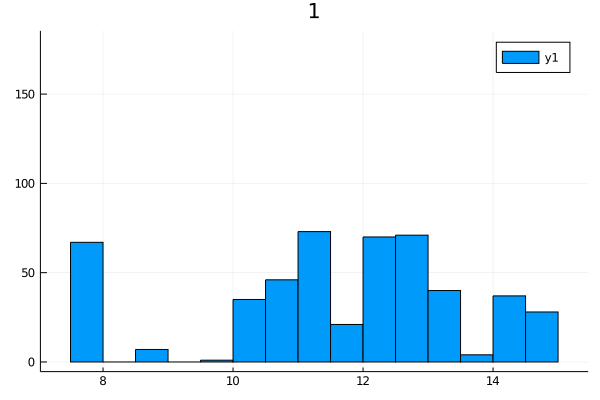

In [7]:
anim = @animate for i in 1:50
    histogram(eval(Meta.parse(reads.speeds[i])),nbins=15,ylim=[0,180],title = string(i))
end

gif(anim, "vels.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/times.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/times.gif")
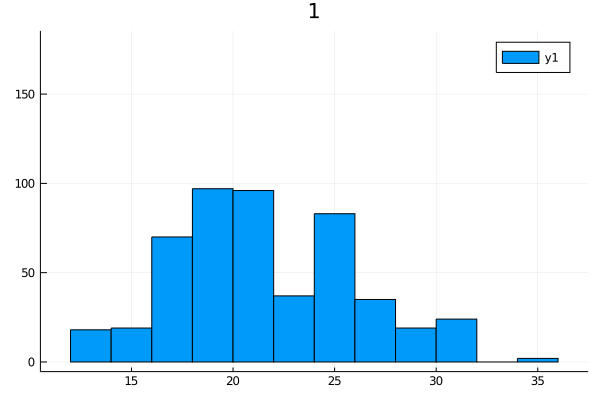

In [10]:
anim = @animate for i in 1:50
    histogram(eval(Meta.parse(reads.times[i])),nbins=15,ylim=[0,180],title = string(i))
end

gif(anim, "times.gif", fps = 2)